In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [58]:

cluster_summary = df.groupby("Cluster").mean()
display(cluster_summary)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_All_Features,DBSCAN_Cluster
Cluster,,,,,,,
0,86.320988,0.407407,42.716049,55.296296,49.518519,0.506173,0.925926
1,162.000000,0.461538,32.692308,86.538462,82.128205,3.153846,1.051282
2,23.090909,0.409091,25.272727,25.727273,79.363636,2.000000,-0.727273
3,164.371429,0.542857,41.114286,88.200000,17.114286,3.000000,0.028571
4,23.000000,0.391304,45.217391,26.304348,20.913043,0.086957,-1.000000


C:\Users\oznur\AppData\Local\Temp\ipykernel_22008\466872148.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x="Gender" , palette="coolwarm");


Text(0.5, 1.0, 'Gender Disteibution')

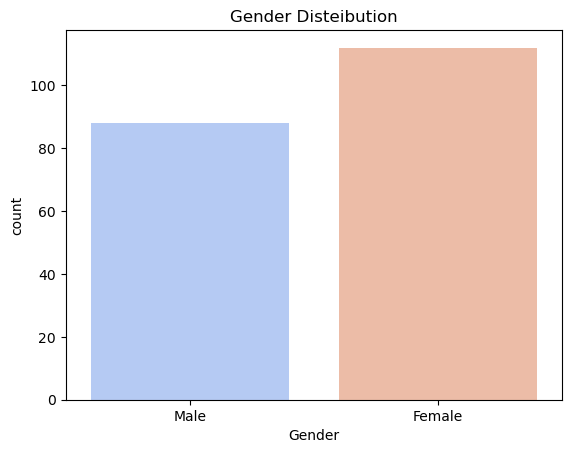

In [13]:
sns.countplot(data=df , x="Gender" , palette="coolwarm");
plt.title("Gender Disteibution")

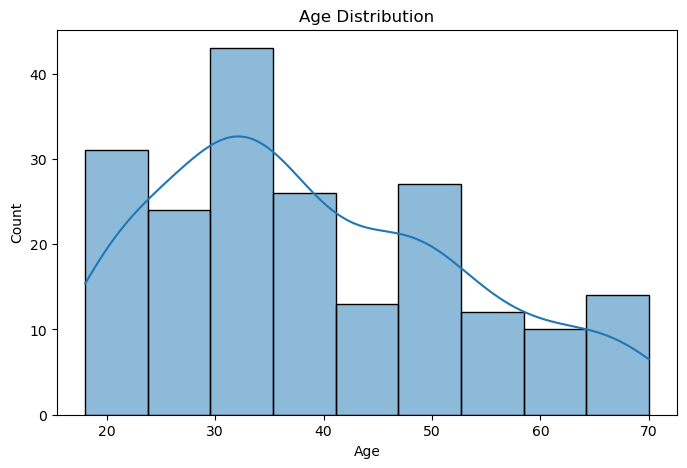

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df ,x="Age", kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

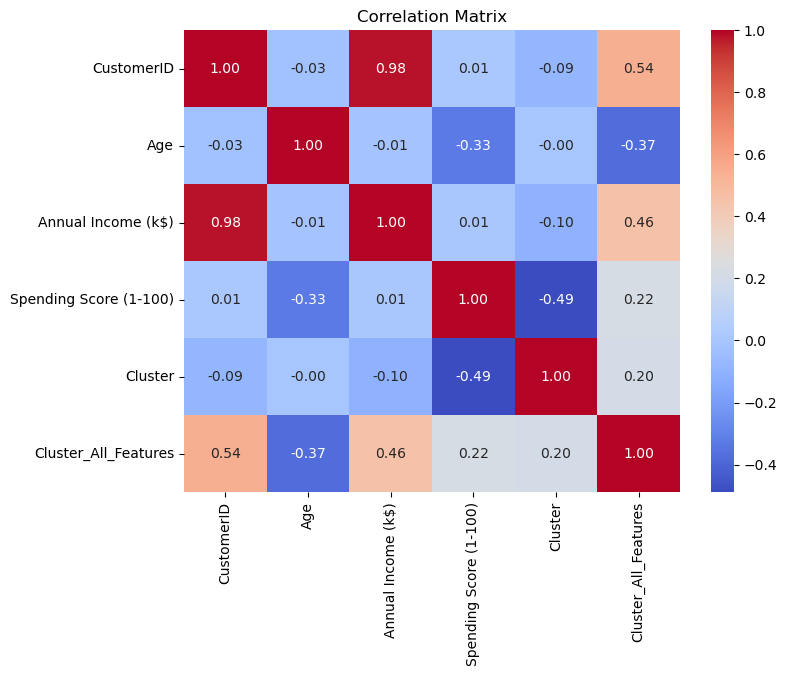

In [31]:
plt.figure(figsize=(8, 6))
numeric_df=df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\oznur\AppData\Local\Temp\ipykernel_22008\3368249856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="viridis")


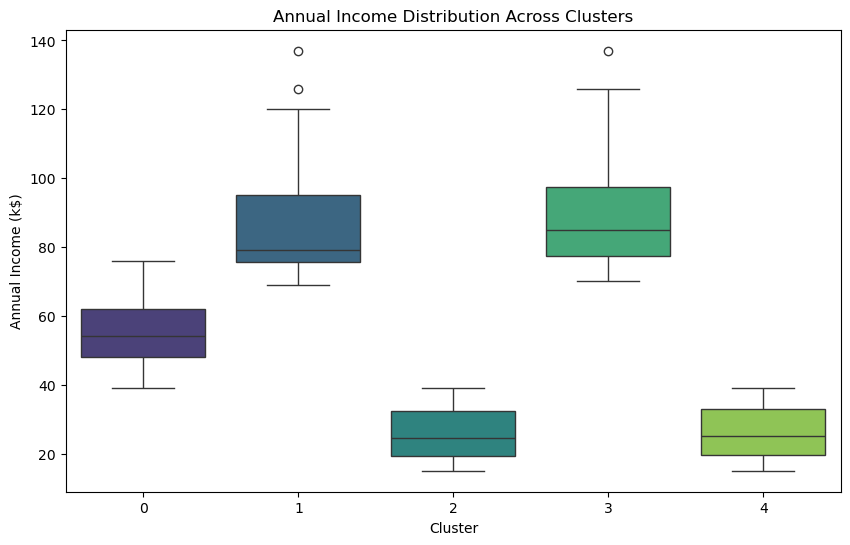

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="viridis")
plt.title("Annual Income Distribution Across Clusters")
plt.show()


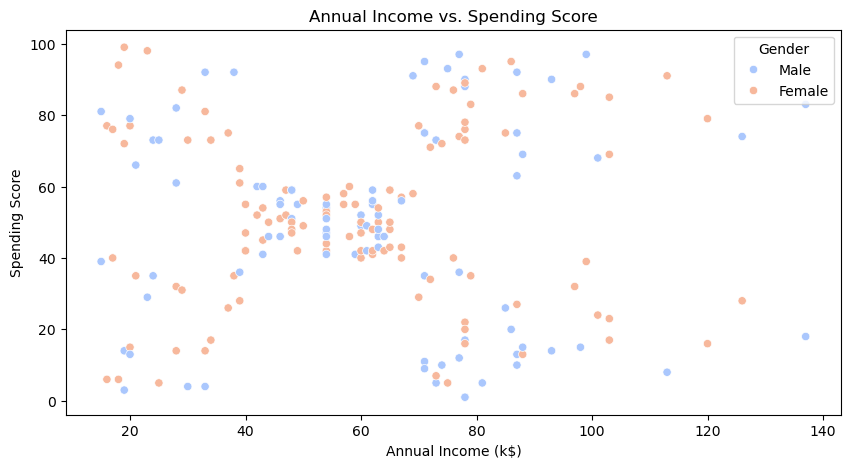

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Gender", palette="coolwarm")
plt.title("Annual Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()


In [21]:
from sklearn.cluster import KMeans
import numpy as np

# Sadece "Yıllık Gelir" ve "Harcama Skoru" değişkenlerini al
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Veri setinin boyutunu kontrol et
print("Seçilen veri setinin boyutu:", X.shape)


Seçilen veri setinin boyutu: (200, 2)


C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

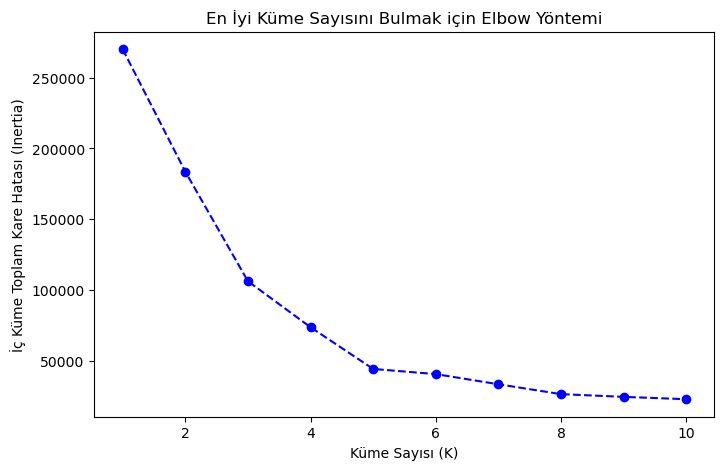

In [22]:
import matplotlib.pyplot as plt

# Elbow Yöntemi için hata oranlarını hesapla
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow Grafiğini Çiz
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("İç Küme Toplam Kare Hatası (Inertia)")
plt.title("En İyi Küme Sayısını Bulmak için Elbow Yöntemi")
plt.show()


In [23]:
# Optimum küme sayısını belirle (Elbow grafiğine göre değiştir)
optimal_k = 5  # Grafikte belirlenen en iyi küme sayısını buraya gir

# K-Means modelini uygula
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X)

# Küme etiketlerini veri setine ekleyelim
df["Cluster"] = clusters


C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


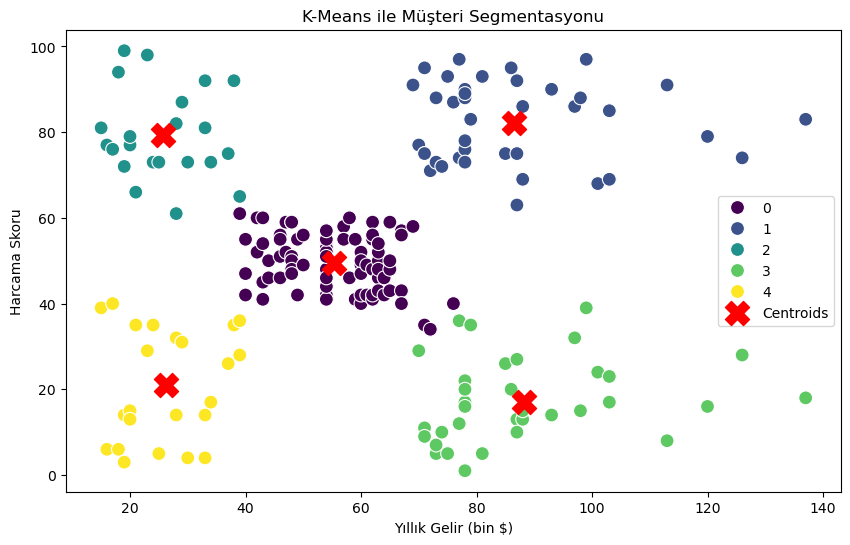

In [24]:
import seaborn as sns

# Kümeleme Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df["Cluster"], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="red", marker="X", label="Centroids")
plt.xlabel("Yıllık Gelir (bin $)")
plt.ylabel("Harcama Skoru")
plt.title("K-Means ile Müşteri Segmentasyonu")
plt.legend()
plt.show()


1️⃣ K-Means Clustering with Two Features (Annual Income & Spending Score)
This visualization shows customer segmentation using only two features: "Annual Income" and "Spending Score."

 Observations:

The clusters are clearly separated, indicating distinct customer groups.
Each cluster represents a different spending behavior based on income levels.
The centroids (red X marks) are positioned logically within each group, ensuring proper segmentation.

 Conclusion:
This method is highly effective in understanding customer segmentation because it uses only two dimensions, making the clusters easy to interpret and visualize.

In [25]:
# Sadece sayısal sütunları seçelim (Müşteri ID ve Cinsiyet hariç)
X_all = df.drop(["CustomerID", "Gender", "Cluster"], axis=1)

# Veri setinin boyutunu kontrol et
print("Selected Features Shape:", X_all.shape)

# K-Means ile kümeleme yapalım
optimal_k = 5  # Elbow yönteminden bulunan optimum küme sayısı
kmeans_all = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
clusters_all = kmeans_all.fit_predict(X_all)

# Yeni küme etiketlerini veri setine ekleyelim
df["Cluster_All_Features"] = clusters_all


Selected Features Shape: (200, 3)


C:\Users\oznur\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


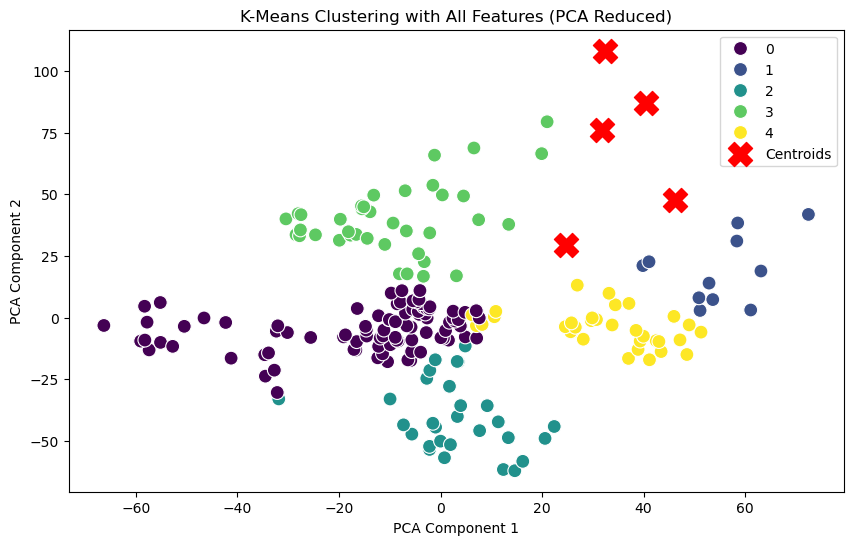

In [26]:
from sklearn.decomposition import PCA

# PCA ile 2 boyuta indirgeme yapalım
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

# Yeni 2 boyutlu verileri kullanarak kümeleme yapalım
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster_All_Features"], palette="viridis", s=100)
plt.scatter(kmeans_all.cluster_centers_[:, 0], kmeans_all.cluster_centers_[:, 1], s=300, c="red", marker="X", label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with All Features (PCA Reduced)")
plt.legend()
plt.show()


K-Means Clustering with All Features (PCA Reduced)

This visualization applies K-Means clustering using all available features, with PCA (Principal Component Analysis) used to reduce dimensionality to 2D.
Observations:

The clusters appear more complex and less distinct compared to the first visualization.
Some clusters overlap slightly, making segmentation less clear.
The centroids (red X marks) are positioned differently than in the first method.

 Why is this happening?

1️ PCA reduces dimensionality but may lose some critical information.

2️ Using multiple features creates more complex patterns, making clusters harder to distinguish.

3 PCA components do not directly correspond to original features (like "Income" or "Spending"), making interpretation less intuitive.

 Conclusion:
 
While using all features can improve clustering performance, it also increases complexity and reduces interpretability when visualized in 2D. If we want to use multiple features effectively, alternative visualization techniques like T-SNE or UMAP may provide better insights.



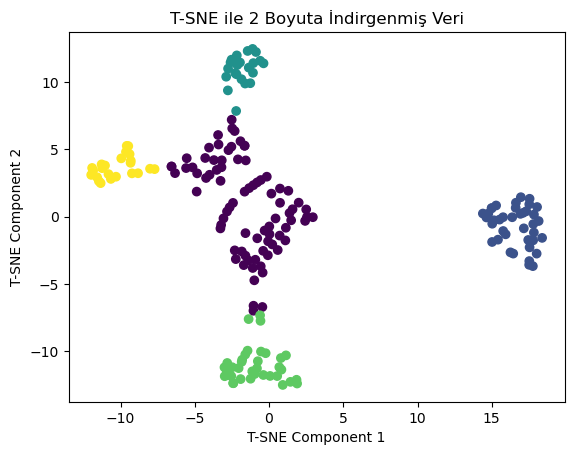

In [29]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["Cluster"], cmap="viridis")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.title("T-SNE ile 2 Boyuta İndirgenmiş Veri")
plt.show()


This visualization represents the customer segmentation using T-SNE (t-Distributed Stochastic Neighbor Embedding).

Unlike PCA, T-SNE preserves the local structure of the data, making it effective for clustering analysis.

 Observations:

The clusters appear well-separated and non-linear, which indicates that the data has complex relationships.

Some groups are tightly packed, while others are more spread out, showing variations in customer behavior.

T-SNE helps in understanding hidden patterns that traditional methods might not reveal.

 Conclusion:
 
T-SNE is a powerful tool for visualizing high-dimensional data in 2D while maintaining meaningful clusters.

However, it should only be used for visualization, as the transformed space is not suitable for direct model training.

## DBSCAN

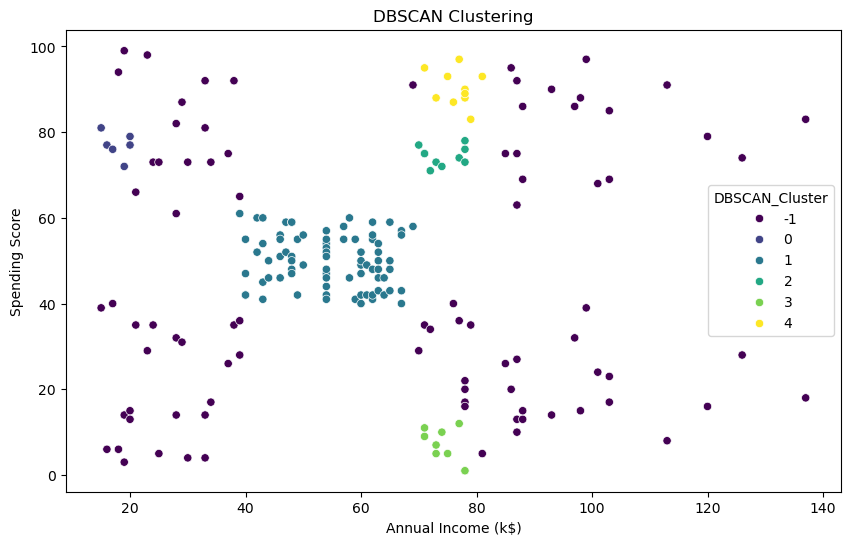

In [34]:
dbscan=DBSCAN(eps=5, min_samples=5)
df["DBSCAN_Cluster"]=dbscan.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df["DBSCAN_Cluster"], palette="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("DBSCAN Clustering")
plt.show()

## Hierarchical Clustering

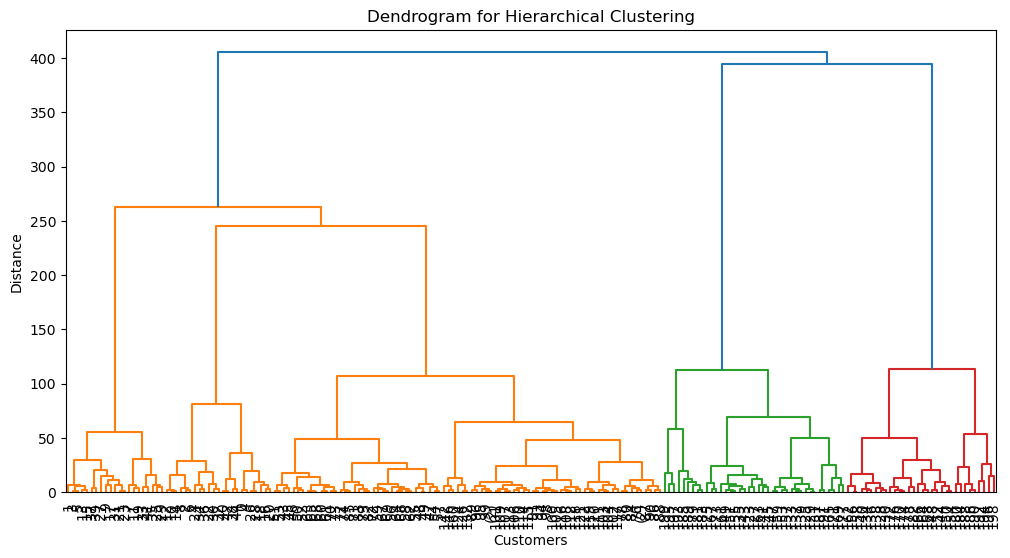

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme
linked = linkage(X, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=10, leaf_rotation=90, leaf_font_size=10)  

plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [43]:


# "Gender" sütununu sayısal hale getir
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])


# Veriyi hazırlayalım
X_model = df.drop(["CustomerID", "Cluster"], axis=1)
y_model = df["Cluster"]

# Eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# XGBoost Modeli Eğitme
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Model Performansı
y_pred = xgb_model.predict(X_test)
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Model Accuracy: 0.95


In [44]:

# Sinir Ağı Modeli
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(8, activation="relu"),
    Dense(len(df["Cluster"].unique()), activation="softmax")  # Çıktı katmanı (her segment için 1 nöron)
])

# Modeli derle
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Modeli eğit
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Model Performansı
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", test_acc)


C:\Users\oznur\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1924 - loss: 12.5872
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2092 - loss: 7.9183 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2576 - loss: 5.2042 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3713 - loss: 3.5859 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 1.7900 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 1.4412 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 1.0146 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6414 - loss: 0.8492 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7702 - loss: 0.5993 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.6070 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7294 - loss: 0.5763 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

## Spending Prediction

In [52]:
y_spending = df["Spending Score (1-100)"]

# Bağımsız değişkenler (X) - Diğer müşteri bilgileri
X_spending = df.drop(["CustomerID", "Spending Score (1-100)"], axis=1)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_spending, y_spending, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression - MAE: {mae}, MSE: {mse}")

Linear Regression - MAE: 15.375786141718473, MSE: 364.47301652037913


In [57]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Random Forest - MAE: {mae_rf} Random Forest - MSE {mse_rf}")
print(f"XGBoost - MAE: {mae_xgb}  XGBoost - MSE {mse_xgb}")


Random Forest - MAE: 6.1515208333333335 Random Forest - MSE 60.066493281250004
XGBoost - MAE: 6.0743022680282595  XGBoost - MSE 58.07635576887386


##  Model Performance Analysis  
This table compares the performance of different models in predicting customer spending scores.  

| **Model**          | **MAE (Mean Absolute Error)** | **MSE (Mean Squared Error)** |
|--------------------|----------------------------|-----------------------------|
| **Linear Regression** | **15.37** | **364.47** |
| **Random Forest**     | **6.15**  | **60.07**  |
| **XGBoost**          | **6.07**  | **58.08  |

📌 **Observations:**  
- **Linear Regression performed the worst**, with the highest MAE (**15.37**) and MSE (**364.47**), meaning it fails to predict spending scores accurately.  
- **Random Forest improved predictions significantly**, reducing the MAE to **6.15** and MSE to **60.07**.  
- **XGBoost achieved the best results**, with the lowest error (**6.07 MAE, 58.08 MSE**), making it the most accuratodel.  

🚀 **Conclusion:**  
XGBoost is the best model for predicting customer spending, followed closely by Random Forest. **Linear Regression is not suitable due to its high error rates.**  
